In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import alpha_vantage as av

In [16]:
ticker = "AAPL"

# get a long history of data for the ticker
start = "2015-01-01"
end = "2025-10-01"

data = yf.download(ticker, start, end, interval="15m")

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['AAPL']: YFPricesMissingError('possibly delisted; no price data found  (15m 2015-01-01 -> 2025-10-01) (Yahoo error = "15m data not available for startTime=1420088400 and endTime=1759291200. The requested range must be within the last 60 days.")')


In [14]:
# print first and time of 2025-10-01
print(data.loc["2025-10-01"].first_valid_index())
print(data.loc["2025-10-01"].last_valid_index())

2025-10-01 13:30:00+00:00
2025-10-01 19:55:00+00:00


In [30]:
from alpha_vantage.timeseries import TimeSeries

API_KEY = "W6Y3L1L2N1I4XKZD"

ticker = "SPY"

# get max history 5m period from alpha vantage
ts = TimeSeries(key=API_KEY, output_format="pandas")
#data1, _ = ts.get_intraday(ticker,  month="2025-10")
#data2, _ = ts.get_intraday(ticker,  month="2025-09", outputsize="full")
data3, _ = ts.get_intraday(ticker,  month="2025-08", outputsize="full", interval="5min")

In [31]:
data3

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2025-08-29 20:00:00,643.2752,643.2752,643.2752,643.2752,1525119.0
2025-08-29 19:55:00,643.1755,643.2553,643.1456,643.2353,14012.0
2025-08-29 19:50:00,643.2253,643.2254,643.0957,643.1456,5661.0
2025-08-29 19:45:00,643.1955,643.2553,643.1655,643.2004,891.0
2025-08-29 19:40:00,643.2254,643.2952,643.1556,643.2254,4737.0
...,...,...,...,...,...
2025-08-01 04:20:00,625.8633,625.8732,625.3846,625.5741,9685.0
2025-08-01 04:15:00,625.5442,626.1425,625.5442,625.8633,30537.0
2025-08-01 04:10:00,625.6439,625.7536,625.2550,625.6140,48347.0


In [1]:
# import library for stock data visualization
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv(r"Data\binance\BTCUSDT_5m_1504137600000_1759190400000_klines.csv")
data.tail(5)

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_volume,taker_buy_quote_volume,ignore
848456,1759188900000,114291.21,114291.22,114242.75,114242.76,7.68820,1759189199999,8.785117e+05,3228,1.15611,1.321068e+05,0
848457,1759189200000,114242.76,114242.76,114222.50,114227.96,15.12649,1759189499999,1.727927e+06,1287,8.25784,9.432782e+05,0
848458,1759189500000,114227.95,114312.79,114227.95,114312.79,17.11972,1759189799999,1.956377e+06,2680,10.42312,1.191073e+06,0
848459,1759189800000,114312.79,114312.79,114258.52,114258.52,14.96374,1759190099999,1.710161e+06,3335,4.76734,5.448307e+05,0
848460,1759190100000,114258.53,114395.92,114258.52,114311.96,43.99809,1759190399999,5.030840e+06,7372,31.32251,3.581268e+06,0


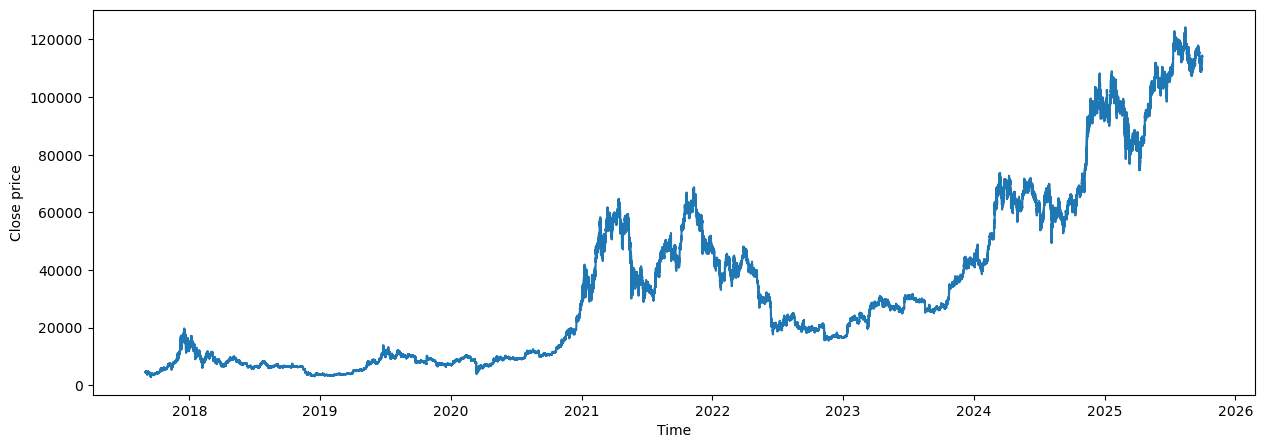

In [ ]:
# create nice plot for the data
plt.figure(figsize=(15, 5))
plt.plot(pd.to_datetime(data["close_time"], unit="ms"), data["close"])
plt.xlabel("Time")
plt.ylabel("Close price")
plt.show()

In [ ]:
# test binance dataloader from binance_dataloader.py
from DataLoaders.binance_dataloader import create_dataloaders
from DataLoaders.binance_dataloader import SeqConfig

cfg = SeqConfig(csv_path=r"Data\binance\BTCUSDT_5m_1504137600000_1759190400000_klines.csv", standardize=True)
train_loader, val_loader, test_loader, stats = create_dataloaders(cfg, batch_size=64)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
for batch in val_loader:
    x = batch["X"]
    x_tgt = batch["X_tgt"]
    time_cont = batch["time_cont"]
    time_cont_tgt = batch["time_cont_tgt"]

    print(x.shape)
    print(x_tgt.shape)
    print(time_cont.shape)
    (print(time_cont_tgt.shape))

    print(x[0].numpy())
    #print(time_idx[0])
    #print(pd.DataFrame(time_cont[0]))

    break

torch.Size([64, 32, 96])
torch.Size([64, 6, 96])
torch.Size([64, 32, 32])
torch.Size([64, 6, 32])
[[ 0.87821895  0.87655604  0.88018554 ...  0.09244277 -0.5662248
   0.02174509]
 [ 0.8808805   0.87907374  0.8828483  ... -0.0572827  -0.52951074
   0.04787375]
 [ 0.8822241   0.88030046  0.8840459  ...  0.3953096  -0.3045839
   0.20391452]
 ...
 [ 0.83427703  0.83244544  0.8305288  ... -0.02915531  1.161818
   1.1838411 ]
 [ 0.82076967  0.8219085   0.8224085  ...  0.2130344  -0.1926652
   0.25598058]
 [ 0.82763726  0.82571715  0.82792217 ... -0.01689986  0.36667776
   0.64369446]]


In [31]:
import time
ms = 1504137600000
print(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime(ms/1000)))

2017-08-31 03:00:00


In [2]:
# testing the patchTransformer with the dataloader
from models.time_series.patchTransformer import PatchTSTEncoder
from DataLoaders.binance_dataloader import create_patch_dataloaders
from DataLoaders.binance_dataloader import SeqConfig

cfg = SeqConfig(csv_path=r"Data\binance\BTCUSDT_5m_1504137600000_1759190400000_klines.csv", standardize=True)
train_loader, val_loader, test_loader, stats = create_patch_dataloaders(cfg, batch_size=64)

model = PatchTSTEncoder(
    patch_len = SeqConfig.patch_len
)

In [7]:
# test that the model works with the dataloader
for batch in train_loader:
    x = batch["X_patch"]
    time_cont_patch = batch["time_cont_patch"]

    print(x.shape)
    print(time_cont_patch.shape)

    #print(x[0].numpy())
    #print(time_idx[0])
    #print(pd.DataFrame(time_cont[0]))

    y = model(x, time_cont_patch)

    print(y.shape)

    break

torch.Size([64, 32, 96])
torch.Size([64, 32, 32])
torch.Size([64, 256])


##### data configs

csv_path: str
seq_len: int = 512
pred_len: int = 96
patch_len: int = 16
patch_stride: int = 16
train_ratio: float = 0.7
val_ratio: float = 0.15
standardize: bool = True   # z-score per feature on TRAIN slice
use_patching: bool = True  # default; can be overridden by create_dataloaders(..., use_patch=...)

##### transformer configs
patch_len: int,
d_model: int = 512,          # transformer hidden dim
nhead: int = 8,              # num of attention heads   
num_layers: int = 4,         # num of transformer blocks
dim_ff: int = 512,           # FFN hidden dim
dropout: float = 0.1,
add_cls: bool = True,
pooling: str = "cls",        # "cls" | "mean"
task: str = "embedding",     # "embedding" | "forecast"
pred_len: int = 96

In [ ]:
from models.time_series.patchTransformer import PatchTSTEncoder
from DataLoaders.binance_dataloader import create_dataloaders
from DataLoaders.binance_dataloader import SeqConfig
from models.jepa.jepa import JEPA
import torch

cfg = SeqConfig(
    csv_path=r"Data\binance\BTCUSDT_5m_1504137600000_1759190400000_klines.csv", 
    seq_len = 1024,
    pred_len = 96,
    patch_len = 16,
    patch_stride = 16,
    train_ratio = 0.7,
    val_ratio = 0.15,
    standardize=True,
    use_patching=True,
    start_date="2022-01-01",
    )

train_loader, val_loader, test_loader, stats = create_dataloaders(cfg, batch_size=64)

jepa_context_encoder = PatchTSTEncoder(
    patch_len= cfg.patch_len,
    d_model= 1024,          # transformer hidden dim
    nhead= 8,              # num of attention heads   
    num_layers = 4,         # num of transformer blocks
    dim_ff = 512,           # FFN hidden dim
    dropout = 0.1,
    add_cls = True,
    pooling = "mean",        # "cls" | "mean"
    pred_len = cfg.pred_len

)

jepa_target_encoder = PatchTSTEncoder(
    patch_len= cfg.patch_len,
    d_model= 1024,          # transformer hidden dim
    nhead= 8,              # num of attention heads   
    num_layers = 4,         # num of transformer blocks
    dim_ff = 512,           # FFN hidden dim
    dropout = 0.1,
    add_cls = True,
    pooling = "mean",        # "cls" | "mean"
    pred_len = cfg.pred_len
)
    
jepa_model = JEPA(
    jepa_context_encoder,
    jepa_target_encoder,
    d_model = 1024
)

# right after building the model
jepa_model.target_enc.load_state_dict(jepa_model.context_enc.state_dict())
for p in jepa_model.target_enc.parameters():
    p.requires_grad_(False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

jepa_context_encoder.to(device)
jepa_target_encoder.to(device)
jepa_model.to(device)

jepa_model.train()
jepa_model.target_enc.eval()

PatchTSTEncoder(
  (proj_price): Linear(in_features=96, out_features=1024, bias=True)
  (proj_time): Linear(in_features=64, out_features=1024, bias=True)
  (posenc): PositionalEncoding()
  (encoder): TransformerEncoder(
    (layers): ModuleList(
      (0-3): 4 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=1024, out_features=1024, bias=True)
        )
        (linear1): Linear(in_features=1024, out_features=512, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=512, out_features=1024, bias=True)
        (norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (final_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
  (head): Identity()
)

In [3]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# test the jepa model

for p in jepa_target_encoder.parameters():
    p.requires_grad = False

#train params

optim = torch.optim.Adam(
    list(jepa_model.context_enc.parameters()) +
    list(jepa_model.proj_online.parameters()) +
    list(jepa_model.predictor.parameters()),
    lr=3e-4,
)
n_epochs = 10
    
ema_start = 0.99
ema_end = 0.999
jepa_ema = torch.linspace(ema_start, ema_end, n_epochs)

def variance_loss(z, eps=1e-4):
    std = torch.sqrt(z.var(dim=0, unbiased=False) + eps)   # [D]
    return torch.mean(F.relu(1.0 - std)) 

for epoch in range(n_epochs):
    i = 0
    total_loss = 0
    epoch_loss = 0
    for batch in train_loader:
        x = batch["X"].to(device)
        time_cont = batch["time_cont"].to(device)
        x_tgt = batch["X_tgt"].to(device)
        time_cont_tgt = batch["time_cont_tgt"].to(device)

        optim.zero_grad()
        # print(x.shape)
        # print(time_cont.shape)
        # print(x_tgt.shape)
        # print(time_cont_tgt.shape)
        
        #p_c_norm, z_t_norm, p_c, z_t = jepa_model(x, time_cont, x_tgt, time_cont_tgt)
        p_c, z_t = jepa_model(x, time_cont, x_tgt, time_cont_tgt)
        
        # print(h_context.shape)
        # print(h_target.shape)
        # print(h_pred.shape)

        loss = F.mse_loss(p_c, z_t)

        # loss_var = variance_loss(p_c) + variance_loss(z_t.detach())
        # loss = jepa_loss + 0.1 * loss_var

        loss.backward()
        torch.nn.utils.clip_grad_norm_(
            list(jepa_model.context_enc.parameters()) +
            list(jepa_model.proj_online.parameters()) +
            list(jepa_model.predictor.parameters()),
            max_norm=1.0
        )

        optim.step()
        m = float(jepa_ema[epoch].item())
        jepa_model.ema_update(decay=m)


        epoch_loss += loss.item()
        total_loss += loss.item()

        if i % 300 == 0:
            print("-----------------------------------------------------")
            print(f"batch: {i}, loss: {(epoch_loss / 300):8f}")
            epoch_loss = 0

            with torch.no_grad():
                # norms
                print("||p||", p_c.norm(dim=-1).mean().item(), "||z_t||", z_t.norm(dim=-1).mean().item())
                # cosine (should be < 0.99 early, then climb)
                print("cos", F.cosine_similarity(
                    F.normalize(p_c,dim=-1), F.normalize(z_t,dim=-1), dim=-1).mean().item())
                # batch std (should not go to ~0)
                print("std p:", p_c.std(dim=0).mean().item(), "std zt:", z_t.std(dim=0).mean().item())

        i += 1

    print(f"epoch: {epoch}, loss: {epoch_loss / len(train_loader):8f}")




-----------------------------------------------------
batch: 0, loss: 0.000489
||p|| 2.1451258659362793 ||z_t|| 11.992112159729004
cos -0.005919725634157658
std p: 0.054135896265506744 std zt: 0.32653868198394775
-----------------------------------------------------
batch: 300, loss: 0.017810
||p|| 15.926987648010254 ||z_t|| 16.533891677856445
cos 0.9645313024520874
std p: 0.4343266189098358 std zt: 0.4602334499359131
-----------------------------------------------------
batch: 600, loss: 0.022285
||p|| 15.514556884765625 ||z_t|| 16.00112533569336
cos 0.942913830280304
std p: 0.4109452962875366 std zt: 0.429920494556427
-----------------------------------------------------
batch: 900, loss: 0.030263
||p|| 13.735312461853027 ||z_t|| 15.088624954223633
cos 0.9428948163986206
std p: 0.33745479583740234 std zt: 0.38923853635787964
-----------------------------------------------------
batch: 1200, loss: 0.039727
||p|| 14.054681777954102 ||z_t|| 15.87862777709961
cos 0.9294566512107849
std p

KeyboardInterrupt: 

In [6]:
from Datasets.datasets import Dataset_Finance

dataset = Dataset_Finance(
    root_path=r"Data\binance",
    data_path=r"BTCUSDT_5m_1504137600000_1759190400000_klines.csv",
    split="train",
    size=[512, 96],
    train_split=0.7,
    test_split=0.15,
    rolling_window=252
)

In [7]:
x = dataset[0]["x_context"]
y = dataset[0]["x_target"]

In [8]:
print(x.shape)
print(y.shape)

torch.Size([512, 9])
torch.Size([96, 9])


In [ ]:
import pandas as pd
# check that the dataset is correct

data = pd.read_csv(r"Data\binance\BTCUSDT_5m_1504137600000_1759190400000_klines.csv")

feature_cols = ["open", "high", "low", "close", "volume"]
data = data[feature_cols]



In [2]:
from Datasets.datasets import Dataset_Finance
from Datasets.dataloaders import DataLoaders

dataset_kwargs = {
    "root_path": r"Data\binance",
    "data_path": r"BTCUSDT_5m_1504137600000_1759190400000_klines.csv",
    "start_date": "2022-12-31",
    "size": [512, 96],  # label_len ignored by your __getitem__
    "rolling_window": 252,
    "use_time_features": True,
    "time_col_name": "close_time",
    "train_split": 0.7,
    "test_split": 0.15,
}

dataloaders = DataLoaders(
    datasetCLS=Dataset_Finance,
    dataset_kwargs=dataset_kwargs,
    batch_size_train=64,
    batch_size_eval=256,
    num_workers=0,
    pin_memory=False,
    drop_last_train=False,
    drop_last_eval=False,
    persistent_workers=False,
    prefetch_factor=None,
)

train_loader = dataloaders.train_loader()
val_loader = dataloaders.val_loader()


In [3]:
batch = next(iter(train_loader))

In [5]:
print(batch["x_context"].shape)
print(batch["x_target"].shape)
print(batch["ohlcv_context"].shape)
print(batch["ohlcv_target"].shape)

torch.Size([64, 512, 9])
torch.Size([64, 96, 9])
torch.Size([64, 512, 5])
torch.Size([64, 96, 5])


In [8]:
print(len(train_loader) * 64)
print(len(val_loader) * 64)

201600
10816


In [ ]:
from Datasets.datasets import Dataset_Finance
from Datasets.dataloaders import DataLoaders

dataset_kwargs = {
    "root_path": r"Data\binance",
    "data_path": r"BTCUSDT_5m_1504137600000_1759190400000_klines.csv",
    "start_date": "2022-12-31",
    "size": [512, 96],  # label_len ignored by your __getitem__
    "rolling_window": 252,
    "use_time_features": True,
    "time_col_name": "close_time",
    "train_split": 0.7,
    "test_split": 0.15,
}

dataloaders = DataLoaders(
    datasetCLS=Dataset_Finance,
    dataset_kwargs=dataset_kwargs,
    batch_size_train=64,
    batch_size_eval=256,
    num_workers=0,
    pin_memory=False,
    drop_last_train=False,
    drop_last_eval=False,
    persistent_workers=False,
    prefetch_factor=None,
)

train_loader = dataloaders.train_loader()
val_loader = dataloaders.val_loader()

201600

In [1]:
# train.py
import torch
from Datasets.dataloaders import DataLoaders
from Datasets.datasets import Dataset_Finance
from models.jepa.jepa import JEPA  # your model that accepts a batch dict
from models.time_series.patchTransformer import PatchTSTEncoder
from Training.engine import Learner, PatchingCallback, StatsPrinter, CSVLogger, CheckpointCallback

dataset_kwargs = {
    "root_path": r"Data\binance",
    "data_path": r"BTCUSDT_5m_1504137600000_1759190400000_klines.csv",
    "start_date": "2022-12-31",
    "size": [512, 96],  # label_len ignored by your __getitem__
    "rolling_window": 252,
    "use_time_features": True,
    "time_col_name": "close_time",
    "train_split": 0.7,
    "test_split": 0.15,
}

dataloaders = DataLoaders(
    datasetCLS=Dataset_Finance,
    dataset_kwargs=dataset_kwargs,
    batch_size_train=64,
    batch_size_eval=256,
    num_workers=0,
    pin_memory=False,
    drop_last_train=False,
    drop_last_eval=False,
    persistent_workers=False,
    prefetch_factor=None,
)

train_loader = dataloaders.train_loader()
val_loader = dataloaders.val_loader()

# 2) Model
jepa_context_encoder = PatchTSTEncoder(
    patch_len=16,
    d_model= 512,          # transformer hidden dim
    nhead= 8,              # num of attention heads   
    num_layers = 4,         # num of transformer blocks
    dim_ff = 512,           # FFN hidden dim
    dropout = 0.1,
    add_cls = True,
    pooling = "mean",        # "cls" | "mean"
    pred_len = 96

)

jepa_target_encoder = PatchTSTEncoder(
    patch_len=16,
    d_model= 512,          # transformer hidden dim
    nhead= 8,              # num of attention heads   
    num_layers =4,         # num of transformer blocks
    dim_ff = 512,           # FFN hidden dim
    dropout = 0.1,
    add_cls = True,
    pooling = "mean",        # "cls" | "mean"
    pred_len = 96
)
    
jepa_model = JEPA(
    jepa_context_encoder,
    jepa_target_encoder,
    d_model = 512
)

  # should accept the batch dict and use keys like "x_context" (patched by callback)

# 3) Loss function
loss_fn = torch.nn.MSELoss()

# 4) Optimizer
opt = torch.optim.Adam(
    list(jepa_model.context_enc.parameters()) +
    list(jepa_model.proj_online.parameters()) +
    list(jepa_model.predictor.parameters()),
    lr=3e-4,
)

# 5) Callbacks
cbs = [
    # Create train-time patches of x_context (+optional x_target) just-in-time
    PatchingCallback(patch_len=16, stride=16, context_key="x_context",
                     target_key="x_target", replace=True, do_on_train=True, do_on_val=True),
    PatchingCallback(patch_len=16, stride=16, context_key="t_context",
                     target_key="t_target", replace=True, do_on_train=True, do_on_val=True),
    StatsPrinter(log_every=100),
    CSVLogger(path="logs/train_log.csv"),
    CheckpointCallback(dirpath="checkpoints", monitor="val_loss", mode="min",
                       every_n_epochs=5, filename_best="best.pt"),
]

# 6) Learner and fit
learn = Learner(model=jepa_model, train_dl=train_loader, val_dl=val_loader,
                loss_func=loss_fn, opt=opt, cbs=cbs, amp=True, grad_clip=1.0)

learn.fit(n_epochs=20)

x_ctx torch.Size([64, 32, 144]) T_ctx torch.Size([64, 32, 32]) x_tgt torch.Size([64, 6, 144]) T_tgt torch.Size([64, 6, 32])
torch.Size([64, 32, 144]) torch.Size([64, 32, 32])
torch.Size([64, 6, 144]) torch.Size([64, 6, 32])


c:\Users\ollik\miniconda3\envs\.deeplearnenv\Lib\site-packages\torch\nn\functional.py:5476: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)


x_ctx torch.Size([64, 32, 144]) T_ctx torch.Size([64, 32, 32]) x_tgt torch.Size([64, 6, 144]) T_tgt torch.Size([64, 6, 32])
torch.Size([64, 32, 144]) torch.Size([64, 32, 32])
torch.Size([64, 6, 144]) torch.Size([64, 6, 32])
x_ctx torch.Size([64, 32, 144]) T_ctx torch.Size([64, 32, 32]) x_tgt torch.Size([64, 6, 144]) T_tgt torch.Size([64, 6, 32])
torch.Size([64, 32, 144]) torch.Size([64, 32, 32])
torch.Size([64, 6, 144]) torch.Size([64, 6, 32])
x_ctx torch.Size([64, 32, 144]) T_ctx torch.Size([64, 32, 32]) x_tgt torch.Size([64, 6, 144]) T_tgt torch.Size([64, 6, 32])
torch.Size([64, 32, 144]) torch.Size([64, 32, 32])
torch.Size([64, 6, 144]) torch.Size([64, 6, 32])
x_ctx torch.Size([64, 32, 144]) T_ctx torch.Size([64, 32, 32]) x_tgt torch.Size([64, 6, 144]) T_tgt torch.Size([64, 6, 32])
torch.Size([64, 32, 144]) torch.Size([64, 32, 32])
torch.Size([64, 6, 144]) torch.Size([64, 6, 32])
x_ctx torch.Size([64, 32, 144]) T_ctx torch.Size([64, 32, 32]) x_tgt torch.Size([64, 6, 144]) T_tgt torc

KeyboardInterrupt: 

In [10]:
print(jepa_model.context_enc.parameters())
print(jepa_model.proj_online.parameters())
print(jepa_model.predictor.parameters())

<generator object Module.parameters at 0x0000023B8BA2ADC0>
<generator object Module.parameters at 0x0000023B8BA2BE60>
<generator object Module.parameters at 0x0000023B8BA2ADC0>
